In [6]:
from math import sqrt, pi
from random import random
from utils import *
from scipy import stats

---
# Ejercicio 6
Estime $\pi$ sorteando puntos uniformemente distribuidos en el cuadrado cuyos vértices son: $(1,1), (-1,1), (-1, -1), (1,-1)$, y contabilizando la fracción que cae adentro del círculo inscrito de radio 1.

a) Utilice un algoritmo para estimar la proporción de puntos que caen dentro del círculo y deténgase cuando la desviación estándar muestral del estimador sea menor que $0,01$


In [2]:
def MonteCarlo_estimation(precision:float) -> tuple[int, list[tuple[float, float]], float]:
    """
    Estimación de π por el método de Monte Carlo

    Returns:
        tuple[int, list[tuple[float, float]], float]: Tupla con:
        - Lista de números que cayeron dentro del círculo
        - Estimación de PI
    """
    pi_numbers = []
    in_circle, n = 0, 1
    mean = 1 if (2 * random() - 1) ** 2 + (2 * random() - 1) ** 2 <= 1 else 0
    Scuad = 0 
    while not(n > 1000 and sqrt(Scuad/n) < precision):
        n += 1
        # Necesito de dos variables aleatorias
        X, Y  = 2 * random() - 1, 2 * random() - 1

        X_i = 1 if X**2 + Y**2 <= 1 else 0

        if X_i:
            pi_numbers.append((X, Y))
            in_circle += 1

        prev_mean = mean
        mean = prev_mean + (X_i - prev_mean) / n
        Scuad = Scuad * (1 - 1 / (n - 1)) + n * (mean - prev_mean) ** 2
    return n, pi_numbers, 4 * in_circle / n

🎯 VALOR EXACTO: π = 3.141592653589793
🤏🏽   ESTIMACIÓN: π ≈ 3.125951962507323
🐛  ITERACIONES: N = 1707
🤬    ERROR ABS: Δ = 0.015640691082470


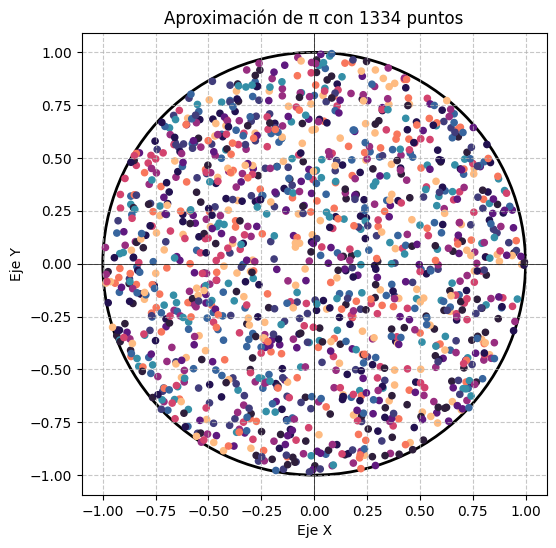

In [3]:
PRECISION = 0.01
results = MonteCarlo_estimation(precision= PRECISION)
print(f"🎯 VALOR EXACTO: π = {pi}")
print(f"🤏🏽   ESTIMACIÓN: π ≈ {results[2]}")
print(f"🐛  ITERACIONES: N = {results[0]}")
print(f"🤬    ERROR ABS: Δ = {abs(pi-results[2]):.15f}")
pi_graphic(pi_numbers=results[1])

---
b) Obtenga un intervalo de ancho menor que 0.1, el cual contenga a $\pi$ con el 95% de confianza. ¿Cuántas ejecuciones son necesarias?


In [14]:
def pi_estimator_w_CI(z_alpha_2:float, precision: float) -> tuple[int, tuple[float, float],
                                                                list[tuple[float, float]],
                                                                float, float]:
    """
    - Estimador de π
    - Número de iteraciones hasta estimar π
    - Intervalo de confianza que contiene a π
    - Longitud del intervalo de confianza
    - Números que caen dentro del radio para representar a π

    Args:
        z_alpha_2 (float): Parámetro del IC
        precision (float): Cota de precisión

    """
    pi_numbers = []
    n, in_circle = 1, 0
    mean = 1 if (2 * random() - 1) ** 2 + (2 * random() - 1) ** 2 <= 1 else 0
    Scuad = 0 
    while not(n > 1000 and sqrt(Scuad/n) < precision):
        n += 1
        # Necesito de dos variables aleatorias
        X, Y  = 2 * random() - 1, 2 * random() - 1

        X_i = 1 if X**2 + Y**2 <= 1 else 0

        if X_i:
            pi_numbers.append((X, Y))
            in_circle += 1

        prev_mean = mean
        mean = prev_mean + (X_i - prev_mean) / n
        Scuad = Scuad * (1 - 1 / (n - 1)) + n * (mean - prev_mean) ** 2
    CI = (4 * mean - 4 * z_alpha_2 * (sqrt(Scuad / n)), 4 * mean + 4 * z_alpha_2 * (sqrt(Scuad / n)))
    L  = 8 * z_alpha_2 * (sqrt(Scuad / n)) 
    estimation = 4 * in_circle / n
    return n, CI, pi_numbers, L, estimation

🎯 VALOR EXACTO: π = 3.141592653589793
🤏🏽   ESTIMACIÓN: π ≈ 3.1450012103606877
🐛  ITERACIONES: N = 4131
🤬    ERROR ABS: Δ = 0.003408556770895
😇 INT. DE CONF: I = (3.095979053098914, 3.1959599447224423)
📐      LONG IC: L = 0.09998089162352791


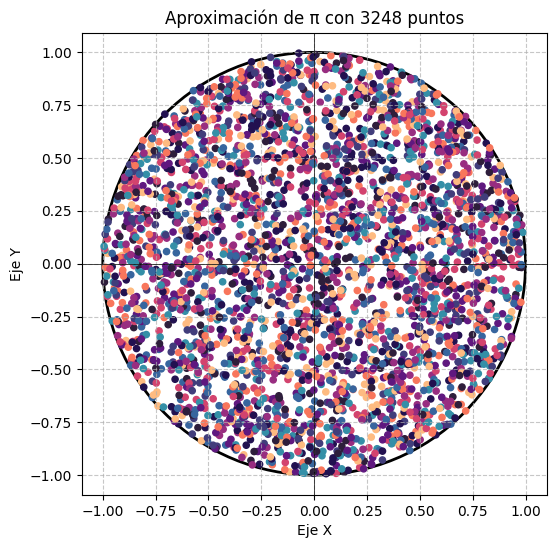

In [24]:
L = 0.1
confiance = 0.95
alpha = 1 - confiance
z_alpha_2 = abs(stats.norm.ppf(alpha / 2))
precision = L / (8 * z_alpha_2 )

results = pi_estimator_w_CI(z_alpha_2=float(z_alpha_2) ,precision=float(precision))

print(f"🎯 VALOR EXACTO: π = {pi}")
print(f"🤏🏽   ESTIMACIÓN: π ≈ {results[4]}")
print(f"🐛  ITERACIONES: N = {results[0]}")
print(f"🤬    ERROR ABS: Δ = {abs(pi-results[4]):.15f}")
print(f"😇 INT. DE CONF: I = ({results[1][0]}, {results[1][1]})")
print(f"📐      LONG IC: L = {results[3]}")
pi_graphic(pi_numbers=results[2])